In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

In [2]:
# Definig the function for model optimization\
def backwardElimination(x, y, sl):
    numVars = len(x[0])
    for i in range(numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            x = np.delete(x, list(regressor_OLS.pvalues).index(maxVar), 1)
    regressor_OLS.summary()
    return x

In [4]:
# Importing the dataset
dataset = pd.read_csv('data/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [6]:
# Avoiding the Dummy variable trap
X = X[:, 1:]

In [7]:
# Splitting the dataset into the train and the test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [8]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

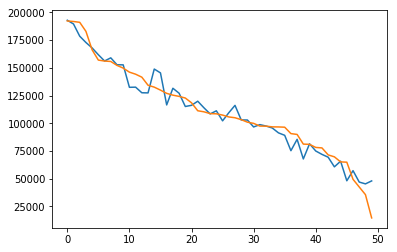

In [11]:
# Displaying the results
y_pred_full = regressor.predict(X)
plt.plot(y_pred_full)
plt.plot(y)
plt.show()

In [12]:
# Building the optional model using Backward Elemination
SL = 0.05
X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_modeled = backwardElimination(X_opt, y, SL)